# THE SPARKS FOUNDATION 

## DOMAIN: Prediction Using Unsupervised ML

### Predict the optimum numbers of clusters & represent it visually

### BY: Rahul Kumar Sethi
### National Institute of Technology - Rourkela

#### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### Importing Iris dataset by downloading the file from the url( https://bit.ly/3kXTdox )

#### Checking data for any anomalies

In [2]:
Data=pd.read_csv('C:/Users/rahulsethi/Documents/ML_DS/Iris.csv')
print('Data imported')
Data.head(10)

Data imported


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
Data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Determining the optimum number of clusters for K Means. Using " The Elbow " method, from the plot, the optimum K value occurs at the elbow. Here, the sum of cluster of squares(W) doesn't decrease significantly. 
#### From the plot, the optimum cluster occurs at around 3. 

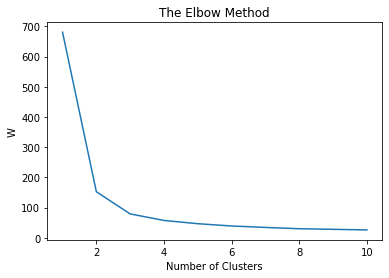

In [5]:
x=Data.iloc[:,[0,1,2,3]].values
W=[]

for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    W.append(km.inertia_)
    
plt.plot(range(1,11),W)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('W')
plt.show()

#### Using the optimum value, creating the K-Means classifier for the dataset

In [6]:
km=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_km=km.fit_predict(x)

#### Visualising the clusters and plotting the centroids

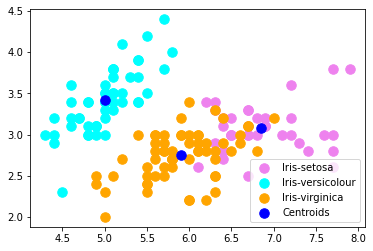

In [7]:
plt.scatter(x[y_km==0,0],x[y_km==0,1],s=90,c='Violet',label='Iris-setosa')
plt.scatter(x[y_km==1,0],x[y_km==1,1],s=90,c='cyan',label='Iris-versicolour')
plt.scatter(x[y_km==2,0],x[y_km==2,1],s=90,c='orange',label='Iris-virginica')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=90,c='blue',label='Centroids')
plt.legend()